In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [59]:
df = pd.read_csv('/kaggle/input/telecom-churn/telecom_churn.csv')
df.shape

(3333, 11)

In [60]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [61]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [62]:
df = df.drop('ContractRenewal',axis=1)
df

,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0.00,2,213.8,105,50.0,7.98,5.0


In [63]:
df.isna().sum()

Churn            0
AccountWeeks     0
DataPlan         0
DataUsage        0
CustServCalls    0
DayMins          0
DayCalls         0
MonthlyCharge    0
OverageFee       0
RoamMins         0
dtype: int64

#no null present in dataset

In [64]:
df.sample(10)

,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1039,0,75,0,0.00,2,122.8,89,39.0,10.57,10.7
2899,0,80,1,1.03,1,190.3,115,65.3,12.83,3.8
665,0,112,1,2.48,2,181.8,110,75.8,11.41,9.2
1611,0,83,1,3.02,0,95.0,89,61.2,8.40,11.2
1851,1,85,0,0.00,5,165.8,96,45.0,9.50,10.9
2587,0,105,0,0.17,3,212.0,113,57.7,11.33,8.9
2983,0,150,0,0.00,1,214.0,117,53.0,9.62,7.9
339,0,78,0,0.00,0,225.1,67,56.0,9.96,14.6
794,0,73,0,0.00,1,187.3,118,53.0,11.99,15.1
717,0,67,0,0.00,1,210.7,116,55.0,10.96,7.2


<AxesSubplot: xlabel='Churn', ylabel='OverageFee'>

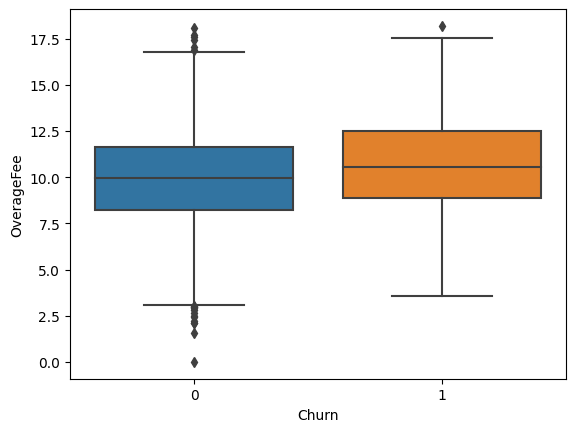

In [65]:
import seaborn as sns
sns.boxplot(x = 'Churn',y='OverageFee',data=df)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

y = df['Churn']
X = df.drop('Churn',axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size=0.80)
input_shape = [X_train.shape[1]]





In [67]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 1,activation = 'sigmoid')
])

In [68]:
model.compile(
optimizer = 'adam',
    loss = 'mae',
    metrics = ['binary_accuracy']
)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
min_delta = 0.001,
    patience = 20,
    restore_best_weights = True,
)

Epoch 1/100
14/14 [==============================] - 2s 25ms/step - loss: 0.3874 - binary_accuracy: 0.6369 - val_loss: 0.8549 - val_binary_accuracy: 0.1451
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2850 - binary_accuracy: 0.7333 - val_loss: 0.8548 - val_binary_accuracy: 0.1451
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2514 - binary_accuracy: 0.7686 - val_loss: 0.8543 - val_binary_accuracy: 0.1451
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2284 - binary_accuracy: 0.7843 - val_loss: 0.8520 - val_binary_accuracy: 0.1463
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2093 - binary_accuracy: 0.8023 - val_loss: 0.8327 - val_binary_accuracy: 0.1583
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.1934 - binary_accuracy: 0.8211 - val_loss: 0.7699 - val_binary_accuracy: 0.2278
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - l

<AxesSubplot: title={'center': 'Accuracy'}>

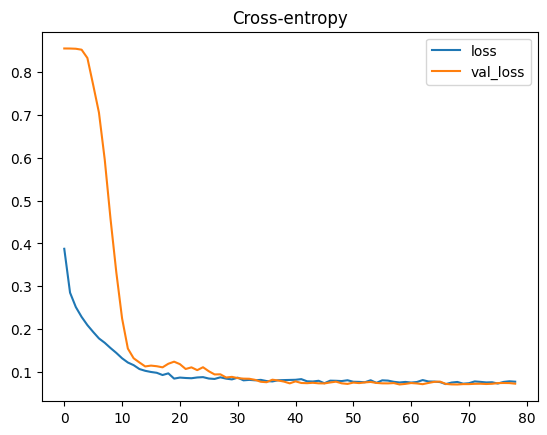

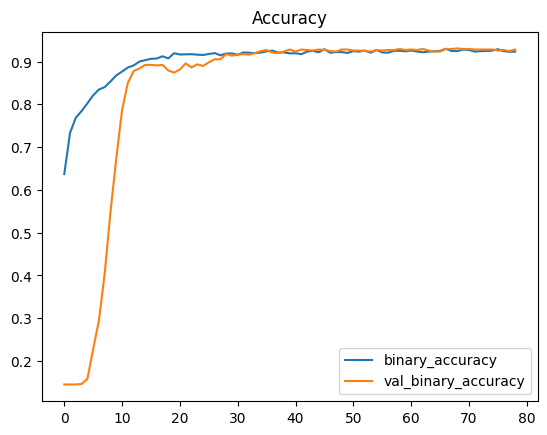

In [70]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=200,
    epochs=100,
    callbacks=[early_stopping],
)

df1 = pd.DataFrame(history.history)
df1.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
df1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")